# 环境准备

In [1]:
import keras
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.4.0


# 文本处理
## one-hot

原始的单词级one-hot

In [2]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1

max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

原始的字符级one-hot

In [10]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # All printable ASCII characters.
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.
print(results)
print(results.shape)
print(results[0][0])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(2, 50, 101)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


keras的one-hot

In [8]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)
print('fit_on_texts')
print(sequences)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print('texts_to_matrix')
print(one_hot_results.shape)
print(one_hot_results)

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print(word_index)
print('Found %s unique tokens.' % len(word_index))

fit_on_texts
[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
texts_to_matrix
(2, 1000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
Found 9 unique tokens.


使用hash的单词级one-hot

In [8]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 8
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index
        # that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
print(results)

[[[0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]]


## word embedding

使用自己训练的Embedding

In [29]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 100

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[1])
print(len(x_train[1]))
print('-------------------------------------')

# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train[1])
print(len(x_train[1]))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

(25000,) (25000,)
(25000,) (25000,)
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
189
-------------------------------------
[ 163   11 3215    2    4 1153    9  194  775    7 8255    2  349 2637
  148  605    2 800

In [30]:
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Flatten
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
# `(samples, maxlen, 8)` into `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
keras.utils.plot_model(model, "../../pic/model.png", show_shapes=True)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10001     
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5952 - acc: 0.6696 - val_loss: 0.3504 - val_acc: 0.8474
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2582 - acc: 0.8991

## 使用预训练的Embedding

In [17]:
# 从http://mng.bz/0tIo下载数据，读取数据
import os

imdb_dir = 'D:\\doc\\data\\aclImdb\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
print(len(labels))

25000


In [31]:
# 将原始文本处理成序列
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 25000 
# validation_samples = 10000
max_words = 10000  # We will only consider the top 10,000 words in the dataset

# 先将文本序列化，只保留max_words个词
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# 将每一行截断
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# 划分训练集、验证集
x_train = data[:training_samples]
y_train = labels[:training_samples]
# x_val = data[training_samples: training_samples + validation_samples]
# y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [39]:
# 将text映射为sequence
print(texts[1])
print(sequences[1])
print(word_index['airport'])

Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son. The luxury jetliner takes off as planned but mid-air the plane is hi-jacked by the co-pilot Chambers (Robert Foxworth) & his two accomplice's Banker (Monte Markham) & Wilson (Michael Pataki) who knock the passengers & crew out with sleeping gas, they plan to steal the valuable cargo & land on a disused plane strip on an isolated island but while making his descent Chambers almost hits an oil rig in the Ocean & loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the Bermuda Triangle. With air in short supply, water leaking in & having flown over 200 miles off course the problems mount for t

In [19]:
# 加载词向量
# https://nlp.stanford.edu/projects/glove
# 这是一个822 MB的压缩文件，文件名是glove.6B.zip，里面包含400000个单词（或非单词的标记）的100维嵌入向量
glove_dir = 'D:\\doc\\data\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index), len(embeddings_index['the']))

Found 400000 word vectors. 100


In [20]:
# 加载预训练好的embedding
# 从40万里面选出当前1万个词的向量，没找到则填0
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [24]:
embedding_matrix[:2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 设置好第一层
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
#                     validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.7448 - acc: 0.5009 - val_loss: 0.6931 - val_acc: 0.4914
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.6953 - acc: 0.5023 - val_loss: 0.6981 - val_acc: 0.4918
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6943 - acc: 0.5043 - val_loss: 0.6943 - val_acc: 0.4904
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6863 - acc: 0.5215 - val_loss: 0.6992 - val_acc: 0.4900
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6729 - acc: 0.5446 - val_loss: 0.7150 - val_acc: 0.4864
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6436 - acc: 0.5783 - val_loss: 0.7440 - val_acc: 0.4820
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.6013 - acc: 0.6118 - val_loss: 0.7868 - val_acc: 0.4838
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

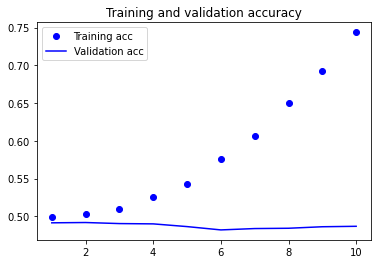

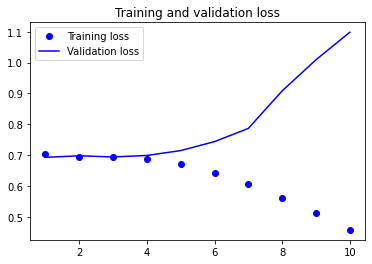

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [82]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 46us/step


[0.9546783626556397, 0.5310800075531006]

结果是预训练的词嵌入对训练数据很少的问题特别有用（否则，针对于具体任务的嵌入可能效果更好）

# RNN (recurrent neural network)
## SimpleRNN

In [1]:
# demo，表示需要返回每个时间步连续输出的完整序列
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('train sequences shape:', input_train.shape)
print('test sequences shape:', input_test.shape)

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
train sequences shape: (25000,)
test sequences shape: (25000,)
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 87ms/step - loss: 0.6824 - acc: 0.5407 - val_loss: 0.4983 - val_acc: 0.7694
Epoch 2/10
157/157 [==============================] - 12s 79ms/step - loss: 0.4495 - acc: 0.7959 - val_loss: 0.3692 - val_acc: 0.8486
Epoch 3/10
157/157 [==============================] - 12s 78ms/step - loss: 0.3146 - acc: 0.8742 - val_loss: 0.3930 - val_acc: 0.8300
Epoch 4/10
157/157 [==============================] - 13s 82ms/step - loss: 0.2354 - acc: 0.9112 - val_loss: 0.5045 - val_acc: 0.7692
Epoch 5/10
157/157 [==============================] - 12s 79ms/step - loss: 0.1654 - acc: 0.9378 - val_loss: 0.5037 - val_acc: 0.8274
Epoch 6/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1157 - acc: 0.9606 - val_loss: 0.4372 - val_acc: 0.8372
Epoch 7/10
157/157 [==============================] - 12s 77ms/step - loss: 0.0771 - acc: 0.9758 - val_loss: 0.4876 - val_acc: 0.8352
Epoch 8/10
157/157 [==============================] - 12s 78ms

In [5]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 131ms/step - loss: 0.6916 - acc: 0.5271 - val_loss: 0.6092 - val_acc: 0.6602
Epoch 2/10
157/157 [==============================] - 22s 143ms/step - loss: 0.4675 - acc: 0.7821 - val_loss: 0.3976 - val_acc: 0.8282
Epoch 3/10
157/157 [==============================] - 22s 143ms/step - loss: 0.3001 - acc: 0.8782 - val_loss: 0.5341 - val_acc: 0.7550
Epoch 4/10
157/157 [==============================] - 22s 143ms/step - loss: 0.1617 - acc: 0.9444 - val_loss: 0.6332 - val_acc: 0.7378
Epoch 5/10
157/157 [==============================] - 23s 148ms/step - loss: 0.0712 - acc: 0.9770 - val_loss: 0.6357 - val_acc: 0.7914
Epoch 6/10
157/157 [==============================] - 22s 142ms/step - loss: 0.0262 - acc: 0.9923 - val_loss: 0.7751 - val_acc: 0.7862
Epoch 7/10
157/157 [==============================] - 22s 141ms/step - loss: 0.0144 - acc: 0.9962 - val_loss: 1.0361 - val_acc: 0.7550
Epoch 8/10
157/157 [==============================] - 2

In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 32s 194ms/step - loss: 0.6840 - acc: 0.5388 - val_loss: 0.4398 - val_acc: 0.8140
Epoch 2/10
157/157 [==============================] - 33s 210ms/step - loss: 0.4195 - acc: 0.8226 - val_loss: 0.6444 - val_acc: 0.7352
Epoch 3/10
157/157 [==============================] - 34s 217ms/step - loss: 0.2965 - acc: 0.8861 - val_loss: 0.3887 - val_acc: 0.8598
Epoch 4/10
157/157 [==============================] - 34s 214ms/step - loss: 0.2088 - acc: 0.9198 - val_loss: 0.5122 - val_acc: 0.7712
Epoch 5/10
157/157 [==============================] - 34s 215ms/step - loss: 0.1269 - acc: 0.9542 - val_loss: 0.6797 - val_acc: 0.8414
Epoch 6/10
157/157 [==============================] - 34s 214ms/step - loss: 0.0839 - acc: 0.9722 - val_loss: 0.5689 - val_acc: 0.8286
Epoch 7/10
157/157 [==============================] - 33s 213ms/step - loss: 0.0294 - acc: 0.9919 - val_loss: 0.7605 - val_acc: 0.7942
Epoch 8/10
157/157 [==============================] - 3

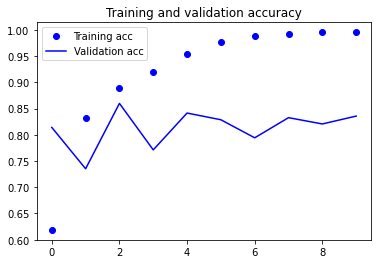

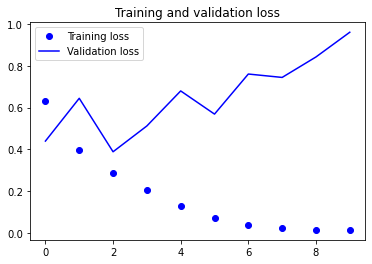

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 177ms/step - loss: 0.5954 - acc: 0.6729 - val_loss: 0.3809 - val_acc: 0.8452
Epoch 2/10
157/157 [==============================] - 28s 175ms/step - loss: 0.3137 - acc: 0.8764 - val_loss: 0.3978 - val_acc: 0.8426
Epoch 3/10
157/157 [==============================] - 28s 175ms/step - loss: 0.2320 - acc: 0.9137 - val_loss: 0.3177 - val_acc: 0.8814
Epoch 4/10
157/157 [==============================] - 27s 170ms/step - loss: 0.1931 - acc: 0.9301 - val_loss: 0.3404 - val_acc: 0.8582
Epoch 5/10
157/157 [==============================] - 27s 169ms/step - loss: 0.1649 - acc: 0.9413 - val_loss: 0.2958 - val_acc: 0.8906
Epoch 6/10
157/157 [==============================] - 26s 169ms/step - loss: 0.1482 - acc: 0.9468 - val_loss: 0.5130 - val_acc: 0.8568
Epoch 7/10
157/157 [==============================] - 26s 167ms/step - loss: 0.1398 - acc: 0.9520 - val_loss: 0.3383 - val_acc: 0.8624
Epoch 8/10
157/157 [==============================] - 2

## 温度数据训练实例
### 获得数据源

In [11]:
import os

# 德国耶拿的马克思 • 普朗克生物地球化学研究所的气象站记录
# https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# 每 10 分钟记录 14 个不同的量
data_dir = 'D:\\doc\\data\\jena_climate_2009_2016.csv'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

In [14]:
print(header)
print(lines[1])
print(len(lines))
print(len(lines)/6/24/365)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
420451
7.999448249619483


In [15]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

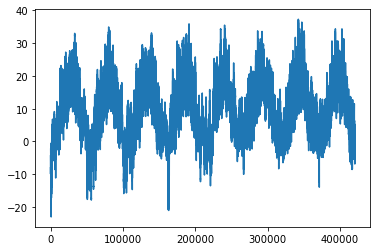

In [16]:
from matplotlib import pyplot as plt

temp = float_data[:, 1]  # temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)
plt.show()

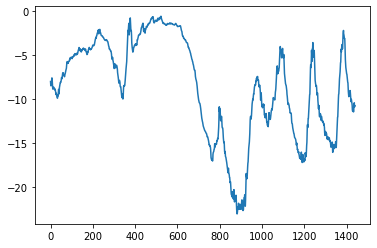

In [17]:
# 放大看十天的温度变化
plt.plot(range(1440), temp[:1440])
plt.show()

### 特征工程处理

In [18]:
# 数据标准化
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [19]:
# data：浮点数数据组成的原始数组
# lookback：输入数据应该包括过去多少个时间步。
# delay：目标应该在未来多少个时间步之后。
# min_index 和 max_index： data 数组中的索引，用于界定需要抽取哪些时间步。这有助于保存一部分数据用于验证、另一部分用于测试。
# shuffle：是打乱样本，还是按顺序抽取样本。
# batch_size：每个批量的样本数。
# step：数据采样的周期（单位：时间步）。我们将其设为 6，为的是每小时抽取一个数据点

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [20]:
# 生成器
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 为了查看整个验证集，需要
# 从 val_gen 中抽取多少次
val_steps = (300000 - 200001 - lookback) // batch_size

# 为了查看整个测试集，需要从
# test_gen 中抽取多少次
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [21]:
# 计算符合常识的基准方法的 MAE
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


In [22]:
# 将 MAE 转换成摄氏温度误差
celsius_mae = 0.29 * std[1]
celsius_mae

2.5672247338393395

### 全连接模型

In [23]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 10s 20ms/step - loss: 1.9155 - val_loss: 0.5979
Epoch 2/20
500/500 [==============================] - 10s 20ms/step - loss: 0.5159 - val_loss: 0.3519
Epoch 3/20
500/500 [==============================] - 10s 20ms/step - loss: 0.3051 - val_loss: 0.3150
Epoch 4/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2701 - val_loss: 0.3053
Epoch 5/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2572 - val_loss: 0.3095
Epoch 6/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2463 - val_loss: 0.3107
Epoch 7/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2403 - val_loss: 0.3199
Epoch 8/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2337 - val_loss: 0.3316
Epoch 9/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2289 - val_loss: 0.3200
Epoch 10/20
500/500 [==============================] - 10s 19ms/step - loss: 0.223

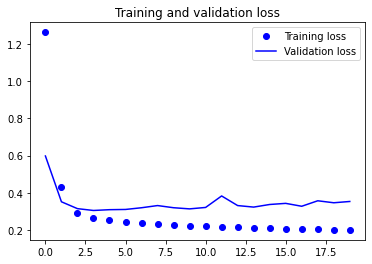

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### GRU模型

In [25]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
model.summary()
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 43s 83ms/step - loss: 0.3422 - val_loss: 0.2723
Epoch 2/20
500/500 [==============================] - 41s 82ms/step - loss: 0.2844 - val_loss: 0.2713
Epoch 3/20
500/500 [==============================] - 41s 82ms/step - loss: 0.2797 - val_loss: 0.2660
Epoch 4/20
500/500 [==============================] - 42s 85ms/step - loss: 0.2776 - val_loss: 0.2669
Epoch 5/20
500/500 [==============================] - 41s 81ms/step - loss: 0.2706 - val_loss: 0.2625
Epoc

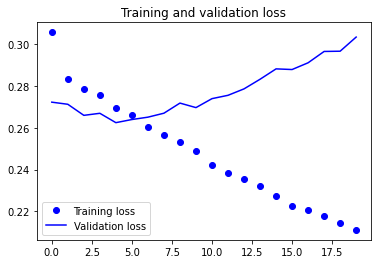

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### GRU模型+Dropout

In [27]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
model.summary()

# dropout，指定该层输入单元的 dropout 比率；
# recurrent_dropout，指定循环单元的 dropout 比率
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4608      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
500/500 [==============================] - 59s 114ms/step - loss: 0.3473 - val_loss: 0.2852
Epoch 2/40
500/500 [==============================] - 57s 115ms/step - loss: 0.3078 - val_loss: 0.2796
Epoch 3/40
500/500 [==============================] - 58s 116ms/step - loss: 0.2999 - val_loss: 0.2829
Epoch 4/40
500/500 [==============================] - 58s 116ms/step - loss: 0.2976 - val_loss: 0.2730
Epoch 5/40
500/500 [==============================] - 58s 116ms/step - loss: 0.2908 - val_loss: 0.2783

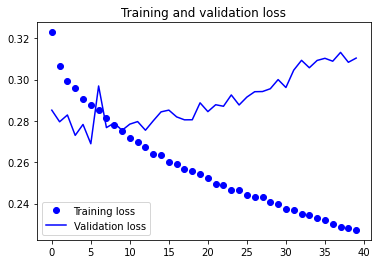

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 多层GRU模型+Dropout

In [29]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
model.summary()
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 32)          4608      
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                18816     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 23,489
Trainable params: 23,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
500/500 [==============================] - 176s 345ms/step - loss: 0.3427 - val_loss: 0.2772
Epoch 2/40
500/500 [==============================] - 169s 339ms/step - loss: 0.3042 - val_loss: 0.2724
Epoch 3/40
500/500 [==============================] - 169s 339ms/step - loss: 0.2947 - val_loss: 0.2705
Epoch 4/40
500/500 [==============================] - 170s 340ms/ste

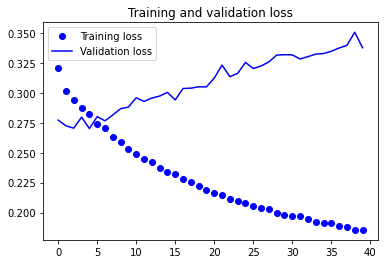

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 双向GRU模型

In [31]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 68s 131ms/step - loss: 0.3228 - val_loss: 0.2693
Epoch 2/40
500/500 [==============================] - 63s 125ms/step - loss: 0.2771 - val_loss: 0.2635
Epoch 3/40
500/500 [==============================] - 63s 125ms/step - loss: 0.2688 - val_loss: 0.2661
Epoch 4/40
500/500 [==============================] - 64s 127ms/step - loss: 0.2648 - val_loss: 0.2647
Epoch 5/40
500/500 [==============================] - 63s 126ms/step - loss: 0.2570 - val_loss: 0.2758
Epoch 6/40
500/500 [==============================] - 64s 129ms/step - loss: 0.2518 - val_loss: 0.2710
Epoch 7/40
500/500 [==============================] - 63s 126ms/step - loss: 0.2429 - val_loss: 0.2703
Epoch 8/40
500/500 [==============================] - 64s 127ms/step - loss: 0.2362 - val_loss: 0.2731
Epoch 9/40
500/500 [==============================] - 66s 132ms/step - loss: 0.2292 - val_loss: 0.2815
Epoch 10/40
500/500 [==============================] - 65s 130ms/step - l

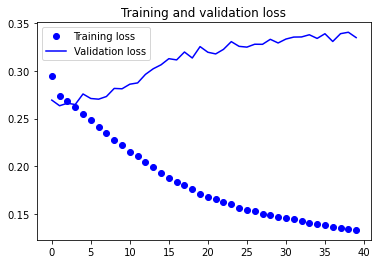

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 一维卷积神经网络处理序列

In [33]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [34]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

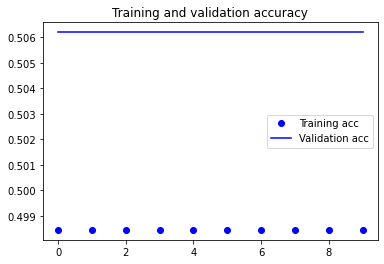

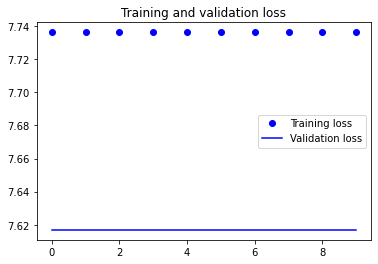

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# RNN+CNN

In [118]:
# We reuse the following variables defined in the last section:
# float_data, train_gen, val_gen, val_steps

import os
import numpy as np

data_dir = 'D:\\Data'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets
        
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [120]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

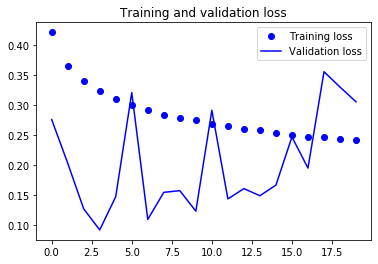

In [121]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [122]:
# This was previously set to 6 (one point per hour).
# Now 3 (one point per 30 min).
step = 3
lookback = 720  # Unchanged
delay = 144 # Unchanged

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [123]:
# Conv1D + GRU
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 48s 97ms/step - loss: nan - val_loss: nan
Epoch 2/20
500/500 

KeyboardInterrupt: 

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()